In [1]:
import os
from osgeo import gdal
import rasterio
import numpy as np
import matplotlib.pyplot as plt

from wqsat_format import s2_reader, atcor, utils

# Read S2 and export tile cropping image by roi_lat_lon

In [ ]:
input_path = '****'
tile = 'S2A_MSIL1C_20220130T105301_N0400_R051_T31SBD_20220130T144107.SAFE'
bands = ["B02", "B03", "B04", "B08"]
roi_lat_lon = {'W': -0.44578, 
               'S': 38.74476, 
               'E': 0.77058, 
               'N': 39.69779}

# Define the path to the tile
tile_path = os.path.join(input_path, tile)

# Read bands
reader = s2_reader.S2Reader(tile_path, bands=bands, roi_lat_lon=roi_lat_lon)
reader.read_bands()

Reading band B04 at 10m resolution...
Reading band B03 at 10m resolution...
Reading band B02 at 10m resolution...
Reading band B08 at 10m resolution...


## Info Geotiff exported

In [ ]:
input_path = '****'
tile = 'S2A_MSIL1C_20220130T105301_N0400_R051_T31SBD_20220130T144107.SAFE'
file = "S2A_MSIL1C_20220130T105301_N0400_R051_T31SBD_20220130T144107_10m.tif"

# Define the path to the tile
tile_path = os.path.join(input_path, tile, file)

# Abrir el archivo con rasterio
with rasterio.open(tile_path) as src:
    print(f"Número de bandas: {src.count}")
    print(f"Dimensiones (alto, ancho): {src.height} x {src.width}")
    print(f"CRS: {src.crs}")
    print(f"Transformación (georreferenciación):\n{src.transform}")

    # Leer todas las bandas como un array 3D (shape: bandas, alto, ancho)
    data = src.read()

    # Leer una banda específica (por ejemplo, la banda 1)
    banda1 = src.read(1)

# Mostrar dimensiones
print("Shape del array completo (bandas, alto, ancho):", data.shape)
print("Banda 1 (primeros 5x5 valores):")
print(banda1[:5, :5])

Número de bandas: 4
Dimensiones (alto, ancho): 10908 x 10834
CRS: EPSG:32631
Transformación (georreferenciación):
| 10.00, 0.00, 200515.37|
| 0.00,-10.00, 4399894.32|
| 0.00, 0.00, 1.00|
Shape del array completo (bandas, alto, ancho): (4, 10908, 10834)
Banda 1 (primeros 5x5 valores):
[[0.01151166 0.01679762 0.022945   0.02171161 0.02621447]
 [0.01818763 0.01791355 0.01552507 0.01857919 0.02157457]
 [0.02120259 0.01256885 0.01108095 0.01673889 0.01507479]
 [0.01816806 0.01108095 0.01803101 0.02038033 0.01746326]
 [0.01409591 0.01503563 0.022945   0.02026286 0.01548592]]


## Plot

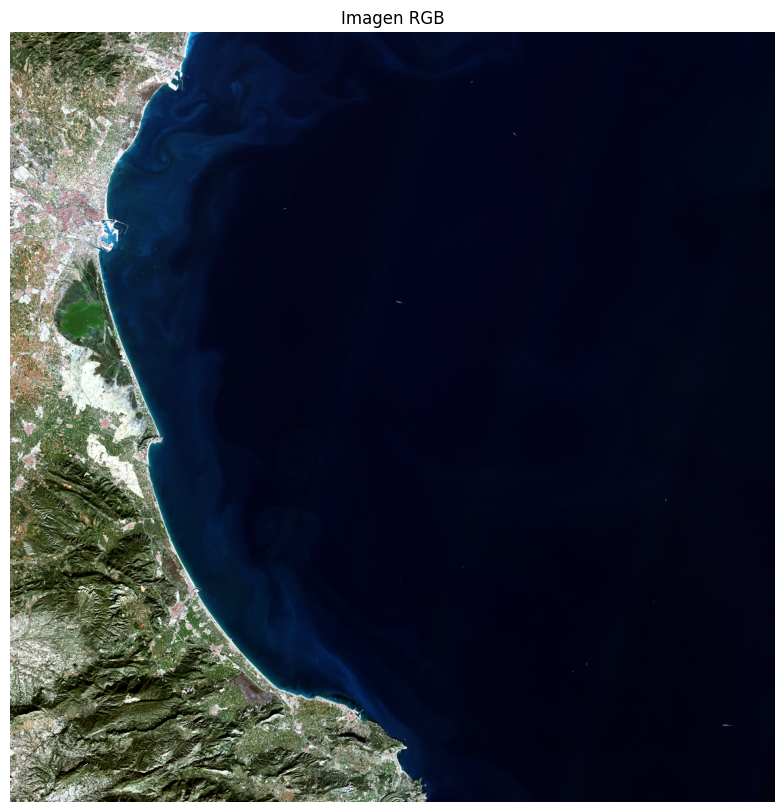

In [4]:
rgb = utils.rgb_image(data[0, :, :], data[1, :, :], data[2, :, :])
# Mostrar la imagen
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title("Imagen RGB")
plt.axis('off')
plt.show()

In [ ]:
input_path = '****'
tile = 'S2A_MSIL1C_20220130T105301_N0400_R051_T31SBD_20220130T144107.SAFE'
file = "S2A_MSIL1C_20220130T105301_N0400_R051_T31SBD_20220130T144107_10m.tif"

input_file = os.path.join(input_path, tile, file)
output_file = os.path.join(input_path, tile, "output.tif")
dataset = gdal.Open(input_file)
# Check if the dataset is valid
if dataset is None:
    print("Error: Unable to open the input file.")
else:
    # Print dataset information
    print("Driver: {}/{}".format(dataset.GetDriver().ShortName, dataset.GetDriver().LongName))
    print("Size is {} x {} x {}".format(dataset.RasterXSize, dataset.RasterYSize, dataset.RasterCount))
    print("Projection is {}".format(dataset.GetProjection()))
    print("GeoTransform: {}".format(dataset.GetGeoTransform()))

    # Reproject the image to EPSG:4326
    gdal.Warp(output_file, dataset, dstSRS = "EPSG:4326", dstNodata = -9999)

/home/dani/github/WqSat_format/.venv/lib/python3.10/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Driver: GTiff/GeoTIFF
Size is 10834 x 10908 x 4
Projection is PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]
GeoTransform: (200515.36704068564, 10.0, 0.0, 4399894.315976594, 0.0, -10.0)


Warning 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.


# Read S2 and export tile cropping image by roi_window

In [ ]:
input_path = '****'
tile = 'S2A_MSIL1C_20210704T142731_N0500_R053_T20LMQ_20230201T055639.SAFE'
bands = ["B02", "B03", "B04", "B05", "B06"]
roi_window = {
    'xmin': 1000,
    'ymin': 2500,
    'xmax': 3000,
    'ymax': 5000
}

# Define the path to the tile
tile_path = os.path.join(input_path, tile)

# Read bands
reader = s2_reader.S2Reader(tile_path, bands=bands, roi_window=roi_window)
reader.read_bands()

Reading band B04 at 10m resolution...
Reading band B03 at 10m resolution...
Reading band B02 at 10m resolution...
Reading band B05 at 20m resolution...
Reading band B06 at 20m resolution...


In [ ]:
input_path = '****'
tile = 'S2A_MSIL1C_20210704T142731_N0500_R053_T20LMQ_20230201T055639.SAFE'
file1 = "S2A_MSIL1C_20210704T142731_N0500_R053_T20LMQ_20230201T055639_10m.tif"
file2 = "S2A_MSIL1C_20210704T142731_N0500_R053_T20LMQ_20230201T055639_20m.tif"

# Define the path to the tile
tile_path = os.path.join(input_path, tile, file1)

# Abrir el archivo con rasterio
with rasterio.open(tile_path) as src:
    print(f"Número de bandas: {src.count}")
    print(f"Dimensiones (alto, ancho): {src.height} x {src.width}")
    print(f"CRS: {src.crs}")
    print(f"Transformación (georreferenciación):\n{src.transform}")

    # Leer todas las bandas como un array 3D (shape: bandas, alto, ancho)
    data = src.read()

    # Leer una banda específica (por ejemplo, la banda 1)
    banda1 = src.read(1)

# Mostrar dimensiones
print("Shape del array completo (bandas, alto, ancho):", data.shape)
print("Banda 1 (primeros 5x5 valores):")
print(banda1[:5, :5])

Número de bandas: 3
Dimensiones (alto, ancho): 2500 x 2000
CRS: EPSG:32720
Transformación (georreferenciación):
| 10.00, 0.00, 409960.00|
| 0.00,-10.00, 8975040.00|
| 0.00, 0.00, 1.00|
Shape del array completo (bandas, alto, ancho): (3, 2500, 2000)
Banda 1 (primeros 5x5 valores):
[[5.6952448e-04 5.4303498e-04 7.4170629e-04 6.6223776e-04 2.2516084e-04]
 [7.4170629e-04 7.9468533e-04 1.1125595e-03 1.0860700e-03 9.1388810e-04]
 [4.9005594e-04 7.6819578e-04 1.0066014e-03 7.9468533e-04 6.0925871e-04]
 [8.3441957e-04 1.0198462e-03 7.6819578e-04 4.5032168e-04 4.9005594e-04]
 [7.6819578e-04 1.0463357e-03 6.6223776e-04 1.5893707e-04 7.9468533e-05]]


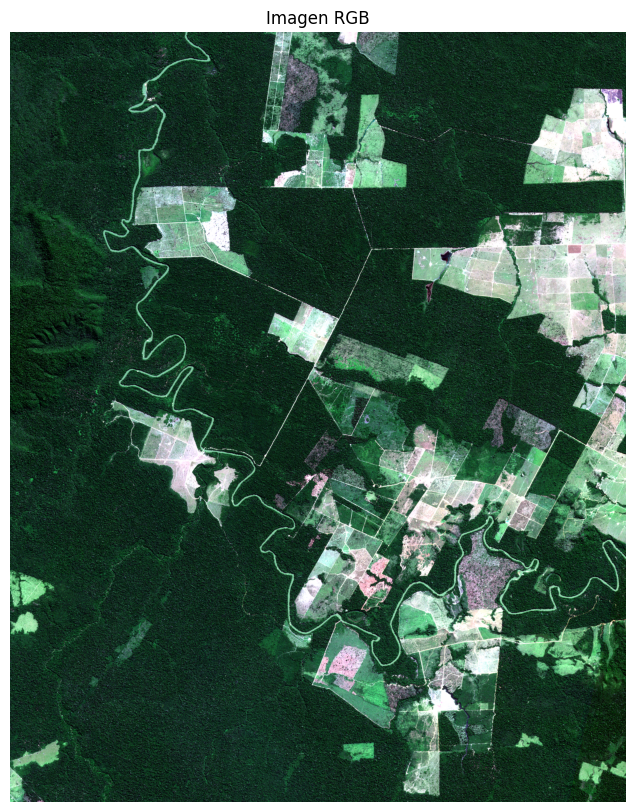

In [8]:
rgb = utils.rgb_image(data[0, :, :], data[1, :, :], data[2, :, :])
# Mostrar la imagen
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title("Imagen RGB")
plt.axis('off')
plt.show()